In [56]:
import pandas as pd
import numpy as np
from pathlib import PurePosixPath, PureWindowsPath

In [57]:
def get_directory(path):
    if os.name == 'posix':
        return str(PurePosixPath(path))
    else:
        return str(PureWindowsPath(path))

In [58]:
# Variables
FERTILIZER_LOCATION = get_directory('./dataset/fertilizer')
TRAIN_SPLIT = 0.8
INPUT_HEADERS = ['temperature', 'humidity', 'ph', 'rainfall', 'is_maize', 'is_grape', 'is_apple', 'is_orange', 'label']

In [59]:
INPUT_HEADERS

['temperature',
 'humidity',
 'ph',
 'rainfall',
 'is_maize',
 'is_grape',
 'is_apple',
 'is_orange',
 'label']

In [60]:
_fert = pd.read_excel(get_directory(FERTILIZER_LOCATION + '/Fertiliser Prediction.xlsx'))

In [61]:
_fert.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
1,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
2,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
3,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
4,61,38,20,18.478913,62.695039,5.970458,65.438354,maize


In [62]:
_fert.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [63]:
#_fert['label'] = pd.Categorical(_fert['label'])
#_fert['label'] = _fert.label.cat.codes

In [64]:
# Sanity check - now Label should be gone, replaced by one-hot encodings
_fert

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
1,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
2,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
3,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
4,61,38,20,18.478913,62.695039,5.970458,65.438354,maize
...,...,...,...,...,...,...,...,...
395,27,30,5,32.717485,90.546083,7.656978,113.328978,orange
396,13,8,12,25.162966,92.547360,7.105905,114.311720,orange
397,6,7,7,27.681673,94.473169,7.199106,113.999515,orange
398,40,17,15,21.350934,90.949297,7.871063,107.086209,orange


In [65]:
_fert['label'] = pd.Categorical(_fert['label'])
_fert['label'] = _fert.label.cat.codes

In [66]:
_fert.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,54,16,22.613600,63.690706,5.749914,87.759539,2
1,61,44,17,26.100184,71.574769,6.931757,102.266244,2
2,80,43,16,23.558821,71.593514,6.657965,66.719955,2
3,73,58,21,19.972160,57.682729,6.596061,60.651715,2
4,61,38,20,18.478913,62.695039,5.970458,65.438354,2


In [67]:
_fert_N = _fert[['N', 'temperature', 'humidity', 'ph', 'rainfall', 'label']].copy()
_fert_P = _fert[['P', 'temperature', 'humidity', 'ph', 'rainfall', 'label']].copy()
_fert_K = _fert[['K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']].copy()

In [68]:
# Labelling representation of each data
_fert_N.loc[:, 'target_output'] = 0
_fert_P.loc[:, 'target_output'] = 1
_fert_K.loc[:, 'target_output'] = 2

_fert_N.rename(columns = {'N': 'output'}, inplace=True)
_fert_P.rename(columns = {'P': 'output'}, inplace=True)
_fert_K.rename(columns = {'K': 'output'}, inplace=True)

In [69]:
# Sanity check
_fert_N

,output,temperature,humidity,ph,rainfall,label,target_output
0,71,22.613600,63.690706,5.749914,87.759539,2,0
1,61,26.100184,71.574769,6.931757,102.266244,2,0
2,80,23.558821,71.593514,6.657965,66.719955,2,0
3,73,19.972160,57.682729,6.596061,60.651715,2,0
4,61,18.478913,62.695039,5.970458,65.438354,2,0
...,...,...,...,...,...,...,...
395,27,32.717485,90.546083,7.656978,113.328978,3,0
396,13,25.162966,92.547360,7.105905,114.311720,3,0
397,6,27.681673,94.473169,7.199106,113.999515,3,0
398,40,21.350934,90.949297,7.871063,107.086209,3,0


In [15]:
_fert_K

,output,temperature,humidity,ph,rainfall,label,target_output
0,16,22.613600,63.690706,5.749914,87.759539,2,2
1,17,26.100184,71.574769,6.931757,102.266244,2,2
2,16,23.558821,71.593514,6.657965,66.719955,2,2
3,21,19.972160,57.682729,6.596061,60.651715,2,2
4,20,18.478913,62.695039,5.970458,65.438354,2,2
...,...,...,...,...,...,...,...
395,5,32.717485,90.546083,7.656978,113.328978,3,2
396,12,25.162966,92.547360,7.105905,114.311720,3,2
397,7,27.681673,94.473169,7.199106,113.999515,3,2
398,15,21.350934,90.949297,7.871063,107.086209,3,2


In [16]:
FERTILISER = _fert_N.copy()
FERTILISER = FERTILISER.append(
    _fert_P, 
    ignore_index=True).append(
        _fert_K,
        ignore_index=True
    )

FERTILISER

,output,temperature,humidity,ph,rainfall,label,target_output
0,71,22.613600,63.690706,5.749914,87.759539,2,0
1,61,26.100184,71.574769,6.931757,102.266244,2,0
2,80,23.558821,71.593514,6.657965,66.719955,2,0
3,73,19.972160,57.682729,6.596061,60.651715,2,0
4,61,18.478913,62.695039,5.970458,65.438354,2,0
...,...,...,...,...,...,...,...
1195,5,32.717485,90.546083,7.656978,113.328978,3,2
1196,12,25.162966,92.547360,7.105905,114.311720,3,2
1197,7,27.681673,94.473169,7.199106,113.999515,3,2
1198,15,21.350934,90.949297,7.871063,107.086209,3,2


In [17]:
# Data to see before deciding on normalisation: max values
FERTILISER.describe()

,output,temperature,humidity,ph,rainfall,label,target_output
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0000,1200.000000
mean,75.238333,22.908862,82.867767,6.304437,94.377141,1.5000,1.000000
std,70.161186,6.253690,11.493721,0.588955,20.189610,1.1185,0.816837
min,0.000000,8.825675,55.282204,5.510925,60.651715,0.0000,0.000000
25%,17.000000,19.723364,78.719580,5.839879,71.424148,0.7500,0.000000
50%,39.000000,22.705257,86.994867,6.206827,102.626226,1.5000,1.000000
75%,135.000000,25.190546,92.049560,6.552920,111.777102,2.2500,2.000000
max,205.000000,41.948657,94.964199,7.995849,124.983162,3.0000,2.000000


In [18]:
FERTILISER.reset_index().drop('index', axis=1)

,output,temperature,humidity,ph,rainfall,label,target_output
0,71,22.613600,63.690706,5.749914,87.759539,2,0
1,61,26.100184,71.574769,6.931757,102.266244,2,0
2,80,23.558821,71.593514,6.657965,66.719955,2,0
3,73,19.972160,57.682729,6.596061,60.651715,2,0
4,61,18.478913,62.695039,5.970458,65.438354,2,0
...,...,...,...,...,...,...,...
1195,5,32.717485,90.546083,7.656978,113.328978,3,2
1196,12,25.162966,92.547360,7.105905,114.311720,3,2
1197,7,27.681673,94.473169,7.199106,113.999515,3,2
1198,15,21.350934,90.949297,7.871063,107.086209,3,2


In [19]:
FERTILISER.dtypes

output             int64
temperature      float64
humidity         float64
ph               float64
rainfall         float64
label               int8
target_output      int64
dtype: object

In [20]:
# manually normalise
#FERTILISER.loc[:, 'output'] = FERTILISER['output'] / 205
#FERTILISER.loc[:, 'temperature'] = FERTILISER['temperature'] / 42
#FERTILISER.loc[:, 'humidity'] = FERTILISER['humidity'] / 95
#FERTILISER.loc[:, 'ph'] = FERTILISER['ph'] / 8
#FERTILISER.loc[:, 'rainfall'] = FERTILISER['rainfall'] / 125

In [21]:
FERTILISER = FERTILISER.sample(frac=1).reset_index().drop('index', axis=1)

FERTILISER_TRAIN = FERTILISER.loc[:int(len(FERTILISER) * TRAIN_SPLIT)].reset_index().drop('index', axis=1)
FERTILISER_TEST = FERTILISER.loc[int(len(FERTILISER) * TRAIN_SPLIT):].reset_index().drop('index', axis=1)

FERTILISER_TRAIN_FEATURES = FERTILISER_TRAIN.copy()
FERTILISER_TEST_FEATURES = FERTILISER_TEST.copy()

FERTILISER_TRAIN_LABEL = FERTILISER_TRAIN_FEATURES.pop('output')
FERTILISER_TEST_LABEL = FERTILISER_TEST_FEATURES.pop('output')

In [22]:
# Check if they're balanced or not
FERTILISER_TRAIN

,output,temperature,humidity,ph,rainfall,label,target_output
0,75,19.398517,62.357506,5.696205,60.951975,2,0
1,23,22.566642,93.374889,7.598729,109.858575,3,1
2,14,21.032001,92.964197,7.684420,110.682394,3,1
3,71,25.107874,55.977328,5.790770,78.160777,2,0
4,18,33.105698,93.484475,7.434119,119.170911,3,1
...,...,...,...,...,...,...,...
956,199,23.710591,93.273924,5.658474,112.667659,0,2
957,10,28.262049,91.983174,6.929216,105.213226,3,2
958,13,23.109427,92.796308,6.383180,108.183792,0,0
959,201,22.782342,94.368035,5.682344,122.144995,0,2


In [23]:
FERTILISER_TEST

,output,temperature,humidity,ph,rainfall,label,target_output
0,8,28.262049,91.983174,6.929216,105.213226,3,0
1,17,23.391282,61.744272,5.871648,107.319813,2,2
2,8,21.032001,92.964197,7.684420,110.682394,3,2
3,28,31.349201,91.482476,7.181908,109.154982,3,1
4,10,34.052969,92.058117,6.725601,116.802085,3,1
...,...,...,...,...,...,...,...
235,142,27.237083,82.945733,6.224543,70.425089,1,1
236,9,10.356096,93.756520,7.796034,101.145695,3,2
237,128,22.608010,94.589006,6.226290,116.039659,0,1
238,5,19.667056,90.500967,7.764040,100.173796,3,2


In [24]:
import seaborn as sns
#sns.pairplot(FERTILISER_TRAIN)

In [25]:
import tensorflow as tf
#fertiliser_train = df_to_dataset(FERTILISER_TRAIN)
#fertiliser_test = df_to_dataset(FERTILISER_TEST)
#dataset = dataset.shuffle(len(_fert)).batch(1)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [26]:
# Create a tf.Dataset
_train_dataset = np.array(FERTILISER_TRAIN)
_test_dataset = np.array(FERTILISER_TEST)

In [37]:
train_dataset

<BatchDataset shapes: ((None, 6), (None,)), types: (tf.float64, tf.int64)>

In [52]:
# Define model
predict_fert = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation=tf.nn.relu, input_shape=[6]),
    tf.keras.layers.Dense(1, activation=tf.nn.relu)
])

#predict_fert.summary()

In [55]:
predict_fert.compile(
    optimizer = tf.optimizers.SGD(learning_rate=0.001),
    loss = tf.keras.losses.MSE,
    metrics = ['acc']
)

hist = predict_fert.fit(
    train_dataset,
    #fertiliser,
    epochs = 50,
#    callbacks = [lr_schedule]
 )

Epoch 1/50
961/961 [==============================] - 3s 2ms/step - loss: 10618.3267 - acc: 0.0063
Epoch 2/50
961/961 [==============================] - 2s 2ms/step - loss: 10108.1706 - acc: 0.0064
Epoch 3/50
961/961 [==============================] - 2s 2ms/step - loss: 10642.1703 - acc: 0.0049
Epoch 4/50
961/961 [==============================] - 2s 2ms/step - loss: 10969.6149 - acc: 0.0072
Epoch 5/50
961/961 [==============================] - 2s 2ms/step - loss: 10526.9035 - acc: 0.0043
Epoch 6/50
961/961 [==============================] - 2s 2ms/step - loss: 10208.7938 - acc: 0.0029
Epoch 7/50
961/961 [==============================] - 2s 2ms/step - loss: 9747.5014 - acc: 0.0060
Epoch 8/50
961/961 [==============================] - 2s 2ms/step - loss: 10071.7544 - acc: 0.0026
Epoch 9/50
961/961 [==============================] - 2s 2ms/step - loss: 10133.6456 - acc: 0.0103
Epoch 10/50
961/961 [==============================] - 2s 2ms/step - loss: 10479.1831 - acc: 0.0126
Epoch 11/5

In [41]:
predict_fert.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [50]:
predict_fert.predict(np.expand_dims(
    FERTILISER_TEST_FEATURES.loc[0].values,
    0
    ))

array([[0.]], dtype=float32)

In [43]:
predict_fert.predict(
    FERTILISER_TEST_FEATURES.loc[0].values,
    0
    )

ValueError: in user code:

    C:\tools\miniconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1574 predict_function  *
        return step_function(self, iterator)
    C:\tools\miniconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1564 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\tools\miniconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\tools\miniconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\tools\miniconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\tools\miniconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1557 run_step  **
        outputs = model.predict_step(data)
    C:\tools\miniconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1530 predict_step
        return self(x, training=False)
    C:\tools\miniconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1014 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\tools\miniconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 6 but received input with shape (None, 1)


In [44]:
predict_fert.predict(np.expand_dims(
    FERTILISER_TEST_FEATURES.loc[237].values,
    0
    ))

array([[0.]], dtype=float32)

In [45]:
predict_fert.predict(np.expand_dims(FERTILISER_TEST_FEATURES.loc[238].values, 0))

array([[0.]], dtype=float32)

In [46]:
FERTILISER_TEST_FEATURES.loc[237]

temperature       22.608010
humidity          94.589006
ph                 6.226290
rainfall         116.039659
label              0.000000
target_output      1.000000
Name: 237, dtype: float64

In [47]:
FERTILISER_TEST

,output,temperature,humidity,ph,rainfall,label,target_output
0,8,28.262049,91.983174,6.929216,105.213226,3,0
1,17,23.391282,61.744272,5.871648,107.319813,2,2
2,8,21.032001,92.964197,7.684420,110.682394,3,2
3,28,31.349201,91.482476,7.181908,109.154982,3,1
4,10,34.052969,92.058117,6.725601,116.802085,3,1
...,...,...,...,...,...,...,...
235,142,27.237083,82.945733,6.224543,70.425089,1,1
236,9,10.356096,93.756520,7.796034,101.145695,3,2
237,128,22.608010,94.589006,6.226290,116.039659,0,1
238,5,19.667056,90.500967,7.764040,100.173796,3,2


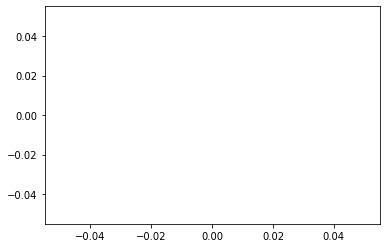

In [29]:
from matplotlib import pyplot as plt

plt.plot(range(len(hist.history['loss'])), hist.history['loss'])
plt.show()

In [28]:
hist.history

{'loss': [0.18927262723445892,
  0.18918836116790771,
  0.18909336626529694,
  0.18898619711399078,
  0.18886560201644897,
  0.1887301355600357,
  0.18857775628566742,
  0.18840639293193817,
  0.18821386992931366,
  0.18799704313278198,
  0.18775340914726257,
  0.1874794214963913,
  0.18717160820960999,
  0.18682576715946198,
  0.18643787503242493,
  0.186003178358078,
  0.18551622331142426,
  0.18497122824192047,
  0.18436217308044434,
  0.18368224799633026,
  0.18292470276355743,
  0.18208079040050507,
  0.18114130198955536,
  0.18009795248508453,
  0.17894195020198822,
  0.177662193775177,
  0.1762455701828003,
  0.17468033730983734,
  0.17295479774475098,
  0.17105832695960999,
  0.1689797341823578,
  0.16670994460582733,
  0.16423088312149048,
  0.16153258085250854,
  0.15860743820667267,
  0.15545153617858887,
  0.1520637571811676,
  0.14844059944152832,
  0.14458300173282623,
  0.1405075639486313,
  0.13623777031898499,
  0.13180546462535858,
  0.12724371254444122,
  0.122578263